In [1]:
from sklearn.datasets import load_boston

dataset = load_boston()

X = dataset.data
y = dataset.target

In [4]:
# dir() shows all methods associated with the data type in parentheses
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
import pandas as pd

In [14]:
X_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y_df = pd.DataFrame(dataset.target, columns = ['price'])

In [15]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
df = pd.concat([X_df, y_df], axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

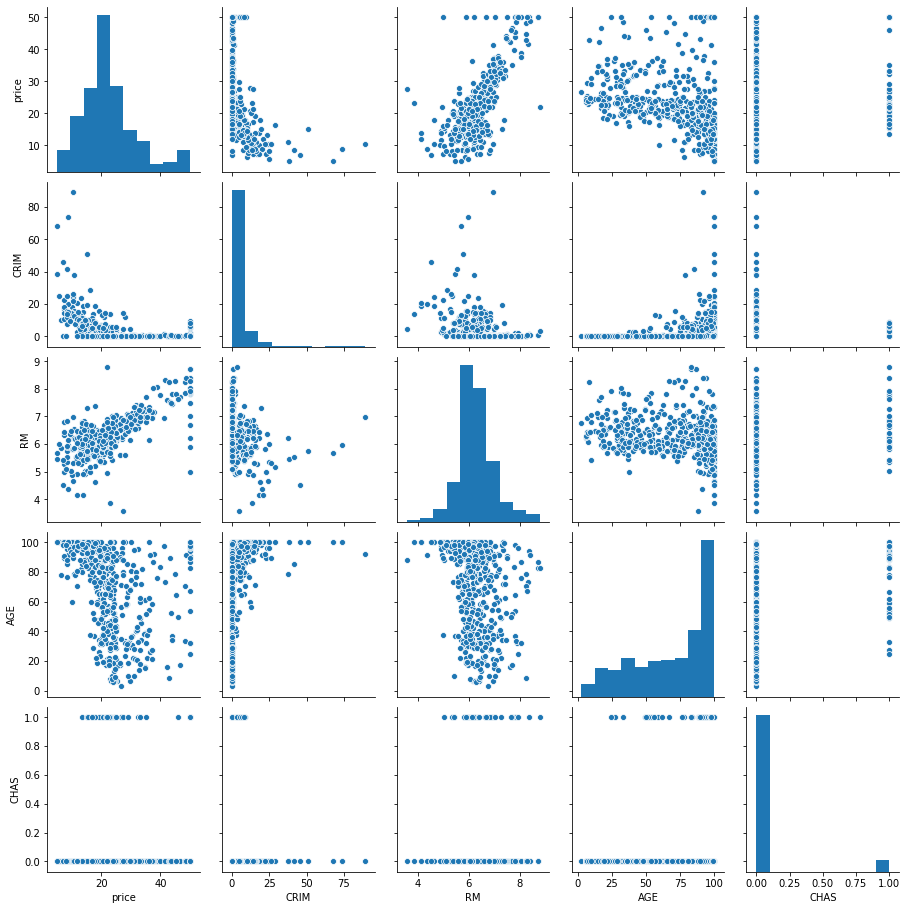

In [18]:
sns.pairplot(df[['price', 'CRIM', 'RM', 'AGE', 'CHAS']])

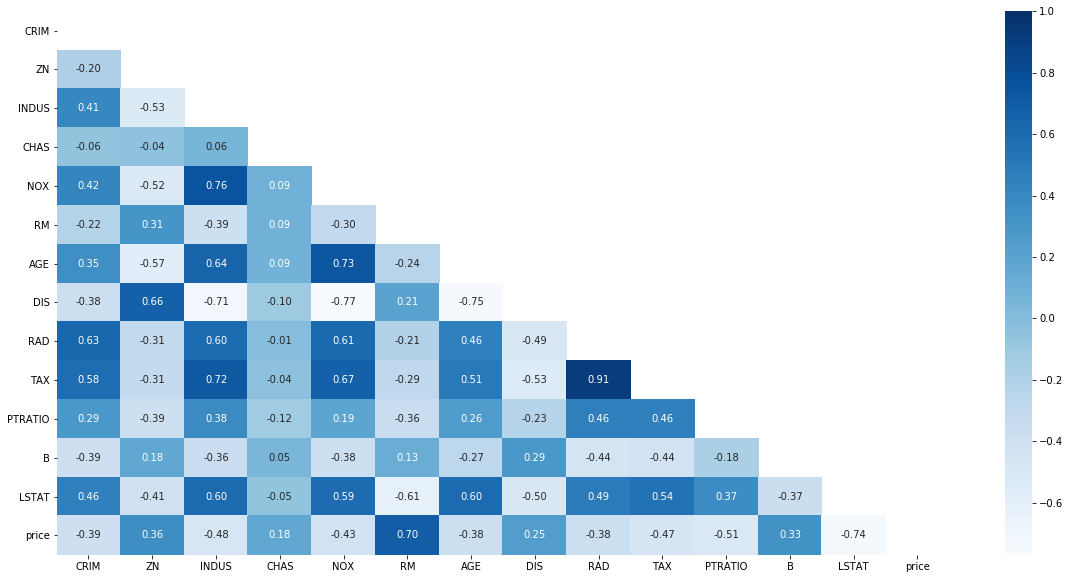

In [23]:
import numpy as np
plt.figure(figsize = (20, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, annot = True, cmap = 'Blues', fmt = '.2f', mask = mask)

In [24]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [37]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)

X_train_scaled

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

# Converting to Tensor

In [39]:
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype = torch.float)
y_train_tensor = torch.tensor(y_train, dtype = torch.float)

X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float)
y_test_tensor = torch.tensor(y_test, dtype = torch.float)


In [40]:
X_train_tensor

tensor([[ 0.8962, -0.5106,  0.9828,  ...,  0.8644,  0.2404,  0.7716],
        [-0.3490, -0.5106, -0.4487,  ...,  1.2212,  0.2085,  0.3225],
        [-0.4176,  0.0341, -0.4875,  ..., -1.3654,  0.4348,  0.9278],
        ...,
        [-0.4345,  2.9757, -1.3297,  ..., -0.5626,  0.3675, -0.9076],
        [ 1.0170, -0.5106,  0.9828,  ...,  0.8644, -2.8098,  1.5023],
        [-0.4067, -0.5106, -0.3883,  ...,  1.1766, -3.2512, -0.2605]])

# Linear Regression Model

## Classes and Objects in Python

In [57]:
# creating a class
class Robot():
    # constructor
    def __init__(self, name, color, weight): # self must be included as well
        self.name = name
        self.color = color
        self.weight = weight
        
        # this sets the 3 objects (self.name, self.color, self.weight) to name, color, and weight
    def introduce_self(self): # self is required for every method that is added to a class
        print('My name is ' + self.name) # self refers to the object this function is run on
        ## without adding self as a parameter of the function, it does not recognize self.name

In [62]:
r1 = Robot('Tom', 'red', 30)
r2 = Robot('Jerry', 'blue', 40)
r1.introduce_self()

My name is Tom


In [66]:
class Person():
    def __init__(self, n, p, i):
        self.name = n
        self.personality = p
        self.is_sitting = i
    
    def sit_down(self):
        self.is_sitting = True
    
    def stand_up(self):
        self.is_sitting = False

In [67]:
p1 = Person('Alice', 'aggressive', False)
p2 = Person('Becky', 'talkative', True)

In [68]:
p1.robot_owned = r2
p2.robot_owned = r1

In [70]:
p1.robot_owned.introduce_self()

My name is Jerry


## Model

In [102]:
import torch
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias = True)
        
    def forward(self, X):
        output = self.linear(X)
        return output
    
model = LinearRegression(13, 1)
model

LinearRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

In [103]:
## Loss Function, Optimizer 정의
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [97]:
X_train_tensor[:, 5].unsqueeze_(-1).shape
# unsqueeze(-1) adds a dimension to the given torch
# X_train_tensor[:, 5] was originally a column with 354 values, but unsqueeze separates all the values to a separate list 
# unsqueeze_ removes the necesssity to assign the unsqueeze version to a variable

torch.Size([339, 1])

In [101]:
X_train_tensor.shape

torch.Size([339, 13])

In [98]:
y_train_tensor.shape

torch.Size([339])

In [104]:
epochs = 10000 # # of steps to calculate the gradient of function

loss_train = []
for epoch in range(epochs):
    prediction = model(X_train_tensor) # what to train model on
    
    loss = criterion(input = prediction, target = y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(loss.item())

606.89404296875
97.28751373291016
88.31397247314453
88.15132141113281
88.1463623046875
88.14530181884766
88.14481353759766
88.14459991455078
88.14449310302734
88.14445495605469
88.1444320678711
88.14437866210938
88.14437866210938
88.14437866210938
88.14437103271484
88.14436340332031
88.14436340332031
88.14434051513672
88.14436340332031
88.14434051513672
88.14436340332031
88.14436340332031
88.14436340332031
88.14436340332031
88.14437103271484
88.14434051513672
88.14436340332031
88.14437866210938
88.14437103271484
88.14436340332031
88.1443862915039
88.14437866210938
88.14437866210938
88.14437866210938
88.14436340332031
88.14436340332031
88.14437866210938
88.14437866210938
88.1443862915039
88.1443862915039
88.14439392089844
88.14440155029297
88.14440155029297
88.14439392089844
88.1443862915039
88.14439392089844
88.14439392089844
88.14439392089844
88.14439392089844
88.1443862915039
88.14437866210938
88.1443862915039
88.14439392089844
88.14439392089844
88.1443862915039
88.14439392089844
88.

# Testing the Model

In [105]:
with torch.no_grad(): # do not calculate the gradient
    model.eval() # starting evaluation of model
    prediction = model(X_test_tensor)
    print(prediction)

tensor([[22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.9708],
        [22.